http://lib.stat.cmu.edu/datasets/Plasma_Retinol

In [53]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('/home/roman/pbc/Untitled Document 1', header=None, delimiter = "\t")
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,64,2,2,21.48380,1,1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,2,1,23.87631,1,1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,2,2,20.01080,2,2372.3,83.6,19.1,14.1,257.9,6321,660,328,721
3,40,2,2,25.14062,3,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615
4,72,2,1,20.98504,1,1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799


AGE: Age (years)  
SEX: Sex (1=Male, 2=Female)  
SMOKSTAT: Smoking status (1=Never, 2=Former, 3=Current Smoker)  
QUETELET: Quetelet (weight/(height^2))  
VITUSE: Vitamin Use (1=Yes, fairly often, 2=Yes, not often, 3=No)  
CALORIES: Number of calories consumed per day  
FAT: Grams of fat consumed per day  
FIBER: Grams of fiber consumed per day  
ALCOHOL: Number of alcoholic drinks consumed per week  
CHOLESTEROL: Cholesterol consumed (mg per day)  
BETADIET: Dietary beta-carotene consumed (mcg per day)  
RETDIET: Dietary retinol consumed (mcg per day)  
BETAPLASMA: Plasma beta-carotene (ng/ml)  
RETPLASMA: Plasma Retinol (ng/ml)  

In [40]:
df = df.rename(columns={0: 'AGE'
                        , 1: 'SEX'
                        , 2: 'SMOKSTAT'
                        , 3: 'QUETELET'
                        , 4: 'VITUSE'
                        , 5: 'CALORIES'
                        , 6: 'FAT',7: 'FIBER', 8: 'ALCOHOL',9: 'CHOLESTEROL', 10: 'BETADIET', 11: 'RETDIET', 12: 'BETAPLASMA', 13: 'RETPLASMA'})

In [41]:
df

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,RETPLASMA
0,64,2,2,21.48380,1,1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,2,1,23.87631,1,1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,2,2,20.01080,2,2372.3,83.6,19.1,14.1,257.9,6321,660,328,721
3,40,2,2,25.14062,3,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615
4,72,2,1,20.98504,1,1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,46,2,2,25.89669,3,2263.6,98.2,19.4,2.6,306.5,2572,1261,164,216
311,45,2,1,23.82703,1,1841.1,84.2,14.1,2.2,257.7,1665,465,80,328
312,49,2,1,24.26126,1,1125.6,44.8,11.9,4.0,150.5,6943,520,300,502
313,31,2,2,23.45255,1,2729.6,144.4,13.2,2.2,381.8,741,644,121,684


In [42]:
df.VITUSE.unique()

array([1, 2, 3])

In [43]:
df.dtypes

AGE              int64
SEX              int64
SMOKSTAT         int64
QUETELET       float64
VITUSE           int64
CALORIES       float64
FAT            float64
FIBER          float64
ALCOHOL        float64
CHOLESTEROL    float64
BETADIET         int64
RETDIET          int64
BETAPLASMA       int64
RETPLASMA        int64
dtype: object

In [44]:
df.isna().sum()

AGE            0
SEX            0
SMOKSTAT       0
QUETELET       0
VITUSE         0
CALORIES       0
FAT            0
FIBER          0
ALCOHOL        0
CHOLESTEROL    0
BETADIET       0
RETDIET        0
BETAPLASMA     0
RETPLASMA      0
dtype: int64

In [45]:
df.shape

(315, 14)

In [46]:
df['SEX'] = df['SEX'].map({1: 'Male', 2: 'Female'})
df['SMOKSTAT'] = df['SMOKSTAT'].map({1: 'Never', 2: 'Former', 3: 'Current_Smoker'})
df['VITUSE'] = df['VITUSE'].map({1: 'Yes,fairly often', 2: 'Yes,not often', 3: 'No'})

In [58]:
df.head()

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA,RETPLASMA
0,64,Female,Former,21.48380,"Yes,fairly often",1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,Female,Never,23.87631,"Yes,fairly often",1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,Female,Former,20.01080,"Yes,not often",2372.3,83.6,19.1,14.1,257.9,6321,660,328,721
3,40,Female,Former,25.14062,No,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615
4,72,Female,Never,20.98504,"Yes,fairly often",1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799


In [60]:
df.ALCOHOL.unique()

array([0.00e+00, 1.41e+01, 5.00e-01, 1.30e+00, 6.00e-01, 1.00e+00,
       9.00e-01, 2.00e+01, 7.00e+00, 5.00e+00, 7.10e+00, 2.30e+00,
       1.80e+01, 4.70e+00, 3.00e+00, 2.00e+00, 4.10e+00, 1.00e-01,
       3.00e-01, 8.00e+00, 7.00e-01, 2.00e-01, 3.20e+00, 7.20e+00,
       1.40e+01, 7.30e+00, 6.50e+00, 1.00e+01, 4.90e+00, 2.03e+02,
       1.70e+00, 3.10e+00, 5.60e+00, 3.70e+00, 6.20e+00, 1.05e+01,
       1.82e+01, 2.10e+01, 6.40e+00, 6.80e+00, 1.10e+01, 4.20e+00,
       8.50e+00, 2.90e+00, 4.00e+00, 1.10e+00, 1.20e+00, 2.20e+01,
       6.70e+00, 3.50e+01, 8.00e-01, 5.20e+00, 2.50e+00, 1.50e+00,
       2.10e+00, 1.50e+01, 4.50e+00, 6.10e+00, 5.70e+00, 8.40e+00,
       2.40e+00, 1.55e+01, 1.40e+00, 1.42e+01, 1.70e+01, 3.40e+00,
       3.50e+00, 8.30e+00, 9.00e+00, 2.60e+00, 2.20e+00])

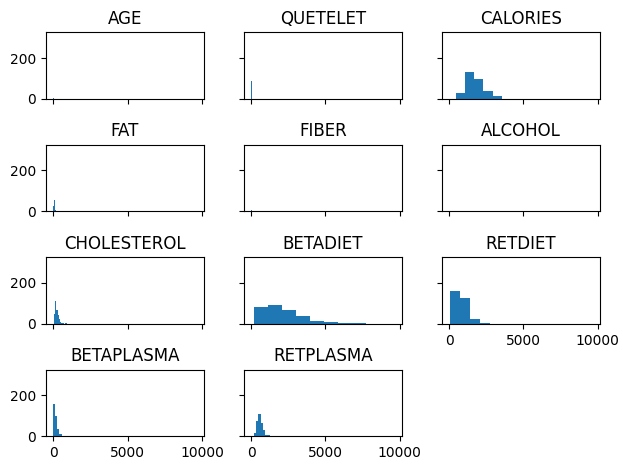

In [50]:
df.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

/home/roman/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


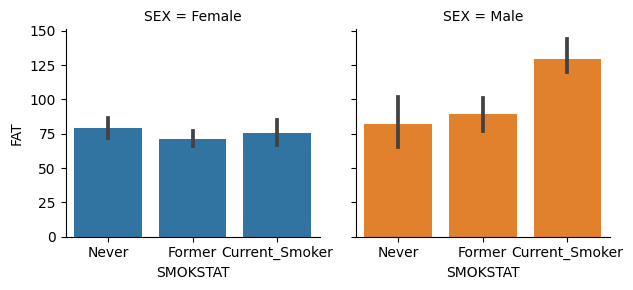

In [63]:
g = sns.FacetGrid(data=df, col='SEX', col_wrap=5, hue='SEX')
g.map(sns.barplot, "SMOKSTAT", "FAT");